In [1]:
import sys
COVID_dir = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling' # set this to your directory
sys.path.insert(1, COVID_dir) 

In [3]:
import numpy as np
from numpy import genfromtxt
import scipy.io
from test import recover_pool_results, test_RS, test_M, get_num_errors, compare_truth_and_estimates
from optimal_sizes import optimal_pool_size, entropy, optimal_column_weight
from membership_matrix import generate_const_col_weight, generate_doubly_regular_col
import matplotlib.pyplot as plt
import json
from util import simulate_x

In [4]:
n = 384
T = 48
fpr, fnr = 0, 0
num_trials = 100

# Test 50 random matrices for k = 5, m = 5

In [4]:
num_M = 50
m = 5
f = 5/384
train_file = './data/n%s-f%.4f-numTrials%s.csv' % (n, f, num_trials)
test_M(m, n, T, f, fpr, fnr, num_M, num_trials, train_file)

Starting matrix 0
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 .

Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting matrix 40
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 

In [8]:
m = 5
k = 5
num_trials = 100

In [6]:
filename = "n%s-f%.4f-numTrials%s-test.csv" % (n, f, num_trials)
simulate_x(n, num_trials, f, filename) 

On average, 5.16 positives in each trail.


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
results_dir = COVID_dir + '/analysis/results/generate_doubly_regular_col/'
with open(results_dir + 'm%s-k%s-n%s-T%s-numM%s-numTrials%s.txt' % (m, k, n, T, num_M, num_trials)) as file:
    data = json.load(file)

In [15]:
train_errors = [] 
test_errors = [] 
true_infection_vectors_file = COVID_dir + '/analysis/data/' + filename
for info in data: 
    train_errors.append(info["num_errors"])
    membership_matrix = np.array(info["membership_matrix"])
    
    test_info = compare_truth_and_estimates(membership_matrix, true_infection_vectors_file, fpr, fnr, f) 
    test_errors.append(test_info["num_errors"])

Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 

Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
Starting trail

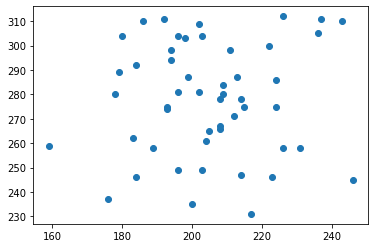

In [17]:
plt.scatter(train_errors, test_errors)

# Test 50 random matrices for k = 2, m = 6

In [4]:
from membership_matrix import generate_doubly_regular_col

In [6]:
k = 2
m = 6
num_trials = 100 
f = k / n
train_file = './data/n%s-f%.4f-numTrials%s.csv' % (n, f, num_trials)
test_file = "./data/n%s-f%.4f-numTrials%s-test.csv" % (n, f, num_trials) 

simulate_x(n, f, train_file) 
simulate_x(n, f, test_file) 

train_errors = [] 
test_errors = [] 

for _ in range(50): 
    M = generate_doubly_regular_col((T, n), m) 
    
    train_info = compare_truth_and_estimates(M, train_file, fpr, fnr, f) 
    train_errors.append(train_info["num_errors"])
    
    test_info = compare_truth_and_estimates(M, test_file, fpr, fnr, f) 
    test_errors.append(test_info["num_errors"])

On average, 1.97 positives in each trail.
On average, 2.04 positives in each trail.


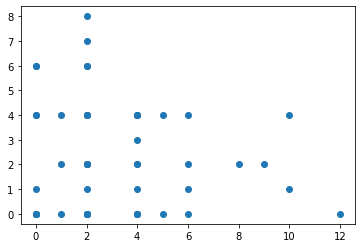

In [7]:
plt.scatter(train_errors, test_errors)

# Test 50 random matrices for k = 3, m = 5

In [8]:
k = 3
m = 5
num_trials = 100 
f = k / n
train_file = './data/n%s-f%.4f-numTrials%s.csv' % (n, f, num_trials)
test_file = "./data/n%s-f%.4f-numTrials%s-test.csv" % (n, f, num_trials) 

simulate_x(n, f, train_file) 
simulate_x(n, f, test_file) 

train_errors = [] 
test_errors = [] 

for _ in range(50): 
    M = generate_doubly_regular_col((T, n), m) 
    
    train_info = compare_truth_and_estimates(M, train_file, fpr, fnr, f) 
    train_errors.append(train_info["num_errors"])
    
    test_info = compare_truth_and_estimates(M, test_file, fpr, fnr, f) 
    test_errors.append(test_info["num_errors"])

On average, 2.99 positives in each trail.
On average, 2.95 positives in each trail.


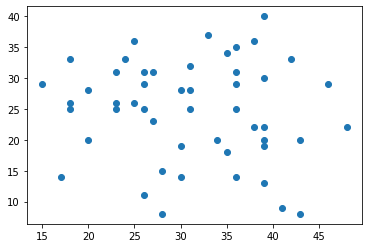

In [9]:
plt.scatter(train_errors, test_errors)

# Test 100 random matrices for k = 4, m = 5

In [10]:
k = 4
m = 5
num_trials = 100 
f = k / n
train_file = './data/n%s-f%.4f-numTrials%s.csv' % (n, f, num_trials)
test_file = "./data/n%s-f%.4f-numTrials%s-test.csv" % (n, f, num_trials) 

simulate_x(n, f, train_file) 
simulate_x(n, f, test_file) 

train_errors = [] 
test_errors = [] 

for _ in range(100): 
    M = generate_doubly_regular_col((T, n), m) 
    
    train_info = compare_truth_and_estimates(M, train_file, fpr, fnr, f) 
    train_errors.append(train_info["num_errors"])
    
    test_info = compare_truth_and_estimates(M, test_file, fpr, fnr, f) 
    test_errors.append(test_info["num_errors"])

On average, 3.94 positives in each trail.
On average, 3.92 positives in each trail.


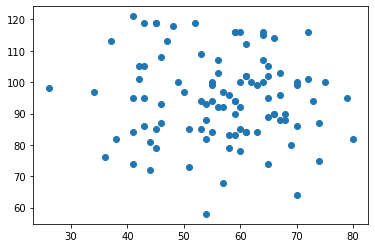

In [11]:
plt.scatter(train_errors, test_errors)

# Inner product matrix of doubly-regular

In [47]:
shape = (3, 4)
M = generate_doubly_regular_col(shape, 2)
print(M)
print((M.T @ M).sum(0)) 

[[1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]]
[6. 5. 5. 6.]
